In [214]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [421]:
months = [
    'январь', 'февраль', 'март', 
    'апрель', 'май', 'июнь', 
    'июль', 'август', 'сентябрь', 
    'октябрь', 'ноябрь', 'декабрь'
]
pref_strs = ['денежные доходы на душу населения/доходы на душу', 'эконом активность/эконом активность']
data_econom = {'2017': dict(), '2018': dict()}
data_money = {'2017': dict(), '2018': dict()}
for year in '2017', '2018':
    for month in months:
        for pref_str in pref_strs:
            data_tmp = pd.read_csv(f'{pref_str} {month} {year}.csv', sep=',', encoding='cp1251')
            data_tmp = data_tmp.fillna(0)
            index_of_outler = data_tmp[(data_tmp['Отклонение от/ФО'] != 0) | (data_tmp['Отклонение от/РФ'] == 0)].index
            data_tmp = data_tmp.drop(index=index_of_outler)
            data_tmp.index = data_tmp['Территория']
            del data_tmp['Территория']
            del data_tmp['Ранг по/ФО']
            del data_tmp['Отклонение от/ФО']
            if month == 'январь':
                del data_tmp[f'к АППГ (январь {int(year)-1}г)/отклонение']
                del data_tmp[f'к АППГ (январь {int(year)-1}г)/темп роста']
            else:
                del data_tmp[f'к АППГ (январь-{month} {int(year)-1}г)/отклонение']
                del data_tmp[f'к АППГ (январь-{month} {int(year)-1}г)/темп роста']
            for col in data_tmp.columns:
                data_tmp[col] = list(map(lambda obj: str(obj).replace(',', '.').replace(' ', '').replace('%', ''), data_tmp[col]))
                data_tmp[col] = data_tmp[col].astype('float64')
            if pref_str == 'эконом активность/эконом активность':
                data_econom[year][month] = data_tmp
            else:
                data_money[year][month] = data_tmp

In [422]:
data_econom['2017']['январь']

,Значение (январь 2017г),Отклонение от/РФ,Ранг по/РФ
Территория,,,
Дальневосточный федеральный округ,70.91,1.50,3.0
Приволжский федеральный округ,68.55,-0.86,5.0
Северо-Западный федеральный округ,71.72,2.31,1.0
Северо-Кавказский федеральный округ,65.69,-3.72,8.0
Сибирский федеральный округ,67.16,-2.25,7.0
Уральский федеральный округ,70.38,0.97,4.0
Центральный федеральный округ,71.47,2.06,2.0
Южный федеральный округ,67.39,-2.02,6.0


In [439]:
data_money['2017']['январь']

,Значение (январь 2017г),Отклонение от/РФ,Ранг по/РФ
Территория,,,
Дальневосточный федеральный округ,27714.0,3483.0,2.0
Приволжский федеральный округ,20528.0,-3703.0,6.0
Северо-Западный федеральный округ,24783.0,552.0,4.0
Северо-Кавказский федеральный округ,18426.0,-5805.0,8.0
Сибирский федеральный округ,18995.0,-5236.0,7.0
Уральский федеральный округ,26933.0,2702.0,3.0
Центральный федеральный округ,30694.0,6463.0,1.0
Южный федеральный округ,21670.0,-2561.0,5.0


In [424]:
ex_rates = pd.read_csv('USDRUB_200901_201128.csv', sep=';')
ex_rates['DATE'] = ex_rates.index
ex_rates.index = pd.RangeIndex(len(ex_rates))
ex_rates['<LAST>'] = ex_rates['<LAST>'].astype('float64')
ex_rates

,<DATE>,<TIME>,<LAST>,<VOL>,<ID>,<OPER>,DATE
0,01:00:00,73.8850,73.9714,73.7400,73.9677,136,01/09/20
1,02:00:00,73.9329,73.9329,73.5670,73.7805,463,01/09/20
2,03:00:00,73.7773,73.8842,73.6140,73.8464,514,01/09/20
3,04:00:00,73.8460,73.9256,73.5750,73.8455,561,01/09/20
4,05:00:00,73.8440,73.9435,73.5900,73.9290,433,01/09/20
...,...,...,...,...,...,...,...
1596,22:00:00,75.9900,76.0313,75.9350,76.0055,7718,27/11/20
1597,23:00:00,75.9970,76.0500,75.8977,75.9689,11906,27/11/20
1598,00:00:00,75.9405,76.0700,75.7760,76.0330,14858,28/11/20
1599,01:00:00,76.0326,76.0638,75.7840,75.9980,404,28/11/20


In [123]:
index_rates = []
for date in ex_rates.index:
    index_rates.append(pd.to_datetime(ex_rates.loc[date, 'DATE'] + ' ' + ex_rates.loc[date, '<DATE>'], format='%d/%m/%y %H:%M:%S'))
ex_rates.index = pd.Index(index_rates)
ex_rates

,<DATE>,<TIME>,<LAST>,<VOL>,<ID>,<OPER>,DATE
2020-09-01 01:00:00,01:00:00,73.8850,73.9714,73.7400,73.9677,136,01/09/20
2020-09-01 02:00:00,02:00:00,73.9329,73.9329,73.5670,73.7805,463,01/09/20
2020-09-01 03:00:00,03:00:00,73.7773,73.8842,73.6140,73.8464,514,01/09/20
2020-09-01 04:00:00,04:00:00,73.8460,73.9256,73.5750,73.8455,561,01/09/20
2020-09-01 05:00:00,05:00:00,73.8440,73.9435,73.5900,73.9290,433,01/09/20
...,...,...,...,...,...,...,...
2020-11-27 22:00:00,22:00:00,75.9900,76.0313,75.9350,76.0055,7718,27/11/20
2020-11-27 23:00:00,23:00:00,75.9970,76.0500,75.8977,75.9689,11906,27/11/20
2020-11-28 00:00:00,00:00:00,75.9405,76.0700,75.7760,76.0330,14858,28/11/20
2020-11-28 01:00:00,01:00:00,76.0326,76.0638,75.7840,75.9980,404,28/11/20


In [124]:
rate_rus_usd = pd.DataFrame(columns=['Электроэнергия', 'Дата'])
current_date = electro.loc[0, 'M_DATE']
for i in electro.index:
    if electro.loc[i, 'M_DATE'] != current_date:
        break
    current_date = electro.loc[i, 'M_DATE']
    oes_center.loc[i] = [electro.loc[i, 'E_USE_FACT'], current_date]
for _ in range(1):
    index_of_outler = oes_center[oes_center['Электроэнергия'] == oes_center['Электроэнергия'].min()].index[0]
    oes_center = oes_center.drop(index=index_of_outler)
oes_center

,Электроэнергия,Дата
0,68776,2020-09-01 00:00:00
1,67846,2020-09-01 01:00:00
2,67186,2020-09-01 02:00:00
3,67243,2020-09-01 03:00:00
4,67973,2020-09-01 04:00:00
...,...,...
2107,102139,2020-11-27 19:00:00
2108,99942,2020-11-27 20:00:00
2109,98026,2020-11-27 21:00:00
2110,93901,2020-11-27 22:00:00


In [426]:
electro = pd.read_csv('Генерация и потребление_01.01.2017.csv', sep=';')
electro['INTERVAL'] = electro['INTERVAL'].astype('int64')
for i in electro.index:
    if i % 1000 == 0:
        print(100 * i // len(electro.index), end='% ')
    electro.loc[i, 'M_DATE'] = pd.to_datetime(electro.loc[i, 'M_DATE'].split()[0], format='%d.%m.%Y') + datetime.timedelta(hours=int(electro.loc[i, 'INTERVAL']))
electro

0 11 22 34 45 57 68 79 91 

,INTERVAL,M_DATE,PRICE_ZONE_ID,POWER_SYS_ID,E_USE_FACT,E_USE_PLAN,GEN_FACT,GEN_PLAN
0,0,2017-01-01 00:00:00,1,530000,26263,26308,26130,26134
1,1,2017-01-01 01:00:00,1,530000,25273,25403,26405,26466
2,2,2017-01-01 02:00:00,1,530000,24475,24513,24934,25021
3,3,2017-01-01 03:00:00,1,530000,23795,23991,24546,24673
4,4,2017-01-01 04:00:00,1,530000,23569,23748,24218,24405
...,...,...,...,...,...,...,...,...
8755,19,2017-12-31 19:00:00,1,530000,28932,29291,26993,27741
8756,20,2017-12-31 20:00:00,1,530000,28234,28232,26590,26755
8757,21,2017-12-31 21:00:00,1,530000,27497,27088,25667,25489
8758,22,2017-12-31 22:00:00,1,530000,25557,25803,24774,24634


In [441]:
oes_center = pd.DataFrame(columns=['Электроэнергия', 'Электроэнергия план'])
oes_center_mean = pd.DataFrame(columns=['Электроэнергия', 'Доходы', 'Экономика'])
prev_date = electro.loc[0, 'M_DATE']
energy = 0
ecominca = 0
bucks = 0
for i in electro.index:
    if i % 500 == 0:
        print(100 * i // len(electro.index), end='% ')
    current_date = electro.loc[i, 'M_DATE']
    if current_date < prev_date:
        break
    if current_date.month != prev_date.month:
        oes_center_mean.loc[i] = [energy/24/30.5, bucks/24/30.5, ecominca/24/30.5]
        bucks = 0
        energy = 0
        ecominca = 0
    energy += electro.loc[i, 'E_USE_FACT']
    year = str(current_date.year)
    month = months[current_date.month-1]
    # print(current_date.year, current_date.month)
    # print(year, month)
    ecominca += data_econom[year][month].loc['Центральный федеральный округ', data_econom[year][month].columns[0]]
    # print(data_econom[year][month].loc['Центральный федеральный округ', data_econom[year][month].columns[0]])
    bucks += data_money[year][month].loc['Центральный федеральный округ', data_money[year][month].columns[0]]
    # print(data_money[year][month].loc['Центральный федеральный округ', data_money[year][month].columns[0]])
    oes_center.loc[current_date] = [electro.loc[i, 'E_USE_FACT'], current_date]
    prev_date = current_date
for _ in range(0):
    index_of_outler = oes_center[oes_center['Электроэнергия'] == oes_center['Электроэнергия'].min()].index[0]
    oes_center = oes_center.drop(index=index_of_outler)
oes_center_mean

0% 5% 11% 17% 22% 28% 34% 39% 45% 51% 57% 62% 68% 74% 79% 85% 91% 97% 

,Электроэнергия,Доходы,Экономика
744,31082.866120,31197.180328,72.641639
1416,28069.352459,33891.934426,65.409836
2160,28477.916667,39953.409836,71.980984
2880,26246.923497,39824.262295,69.462295
3624,24610.868852,38100.524590,71.980984
4344,23109.170765,41120.655738,69.875410
5088,23417.505464,42491.344262,72.377377
5832,24078.893443,39547.868852,72.540000
6552,24238.107923,38816.065574,70.426230
7296,28289.433060,40633.377049,73.068525


In [443]:
x = oes_center_mean[['Доходы', 'Экономика']].to_numpy()
y = oes_center_mean['Электроэнергия'].to_numpy()

In [444]:
x

array([[31197.18032787,    72.64163934],
       [33891.93442623,    65.40983607],
       [39953.40983607,    71.98098361],
       [39824.26229508,    69.46229508],
       [38100.52459016,    71.98098361],
       [41120.6557377 ,    69.87540984],
       [42491.3442623 ,    72.37737705],
       [39547.86885246,    72.54      ],
       [38816.06557377,    70.42622951],
       [40633.37704918,    73.06852459],
       [39248.85245902,    70.81967213]])

In [445]:
y

array([31082.86612022, 28069.35245902, 28477.91666667, 26246.92349727,
       24610.86885246, 23109.17076503, 23417.50546448, 24078.89344262,
       24238.1079235 , 28289.43306011, 29051.75273224])

In [309]:
y_list = pd.DataFrame(columns=['index'])
x_list = pd.DataFrame(columns=['index'])
for time in y.index:
    if time in x.index:
        x_list.loc[time] = x.loc[time]
        y_list.loc[time] = y.loc[time]

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [310]:
x_list

,index


In [311]:
y_list

,index


In [209]:
x = x_list.astype('float64').to_numpy()
y = y_list.astype('float64').to_numpy()

In [312]:
x = x.reshape(-1, 1)

In [313]:
y = y.reshape(-1, 1)

In [547]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=729
)

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7972340982517856

In [548]:
y_test

array([31082.86612022, 24238.1079235 ])

In [549]:
model.predict(x_test)

array([31289.01410573, 26407.75460491])

In [550]:
model.coef_

array([ -0.57527986, 224.91019524])

In [551]:
oes_center_mean['Предсказания'] = model.predict(x)

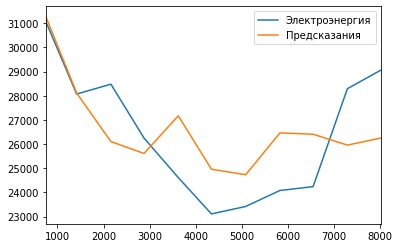

In [552]:
oes_center_mean[['Электроэнергия', 'Предсказания']].plot()